Project pt.1 / Samuele / width and lenght distribution

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
#load data

--2025-01-18 17:16:48--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘magic04.data.1’

magic04.data.1          [         <=>        ]   1.41M   746KB/s    in 1.9s    

2025-01-18 17:16:51 (746 KB/s) - ‘magic04.data.1’ saved [1477391]



In [29]:
!cat /home/samu/LaboratoryOfComputationalPhysics_Y7/Project/magic04.data  ## show data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
file_name="/home/samu/LaboratoryOfComputationalPhysics_Y7/Project/magic04.data"
data = pd.DataFrame(pd.read_csv(file_name))
data.columns=['fLength','fWidth','fSize',
        'fConc','fConc1','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist','category']
data   
#### save data in a DataFrame


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,category
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [4]:
## save the two columns I care about
## I may not need this if I use only dataframe and pandas
#length = np.array(data.fLength)
#print('lenght=', length)
#width = np.array(data.fWidth)
#print('width=',width)

## find mean and std
##print(data.describe()) ##useful as a comparison, gives you general values of the dataset, also mean and std
mu_l=data['fLength'].mean()
std_l=data['fLength'].std()
mu_w=data['fWidth'].mean()
std_w=data['fWidth'].std()
print('Length attribute:   mean = ', mu_l, '    std = ', std_l)
print('Width attribute:    mean = ', mu_w, '   std = ', std_w)


Length attribute:   mean =  53.25143966559756     std =  42.3655976356796
Width attribute:    mean =  22.181291098375308    std =  18.34648391015197


    scaled_fLength  scaled_fWidth   fLength    fWidth
0        -0.510977      -0.570016   31.6036   11.7235
1         2.568135       6.205533  162.0520  136.0310
2        -0.694767      -0.687243   23.8172    9.5728
3         0.516569       0.476342   75.1362   30.9205
4        -0.038414      -0.056201   51.6240   21.1502
5        -0.118130      -0.262982   48.2468   17.3565
6        -0.624604      -0.459041   26.7897   13.7595
7         1.014532       1.326424   96.2327   46.5165
8        -0.153179      -0.380563   46.7619   15.1993
9         0.224832       0.421286   62.7766   29.9104
10       -0.811867      -0.311847   18.8562   16.4600
11       -0.179847       0.028818   45.6321   22.7100
12       -0.473725      -0.529572   33.1818   12.4655
13        0.170104       0.595472   60.4580   33.1061
14       -0.561242       0.015088   29.4741   22.4581
15       -0.403095      -0.244995   36.1741   17.6865
16       -0.164283      -0.335132   46.2915   16.0328
17       -0.169775      -0.1

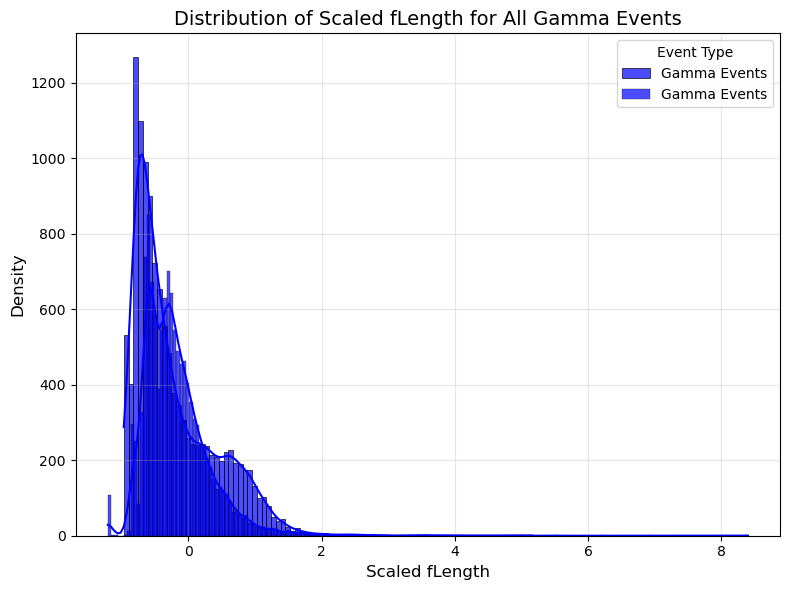

In [6]:
#### ATTENZIONE RUNNARE TUTTO ASSICURARSI CHE SIA FATTO BENE IL DATAFRAME E MU E STD CHE SE NO SI SFANCULA TUTTO

#print(data['fLength'].head(30))
data['scaled_fLength']= (data['fLength']-mu_l)/std_l   ##add a scaled comlumn to the DataFrame
data['scaled_fWidth']= (data['fWidth']-mu_w)/std_w  
print(data[['scaled_fLength','scaled_fWidth','fLength','fWidth']].head(30))
#print(data['scaled_fLength'].mean())
#print(data['scaled_fLength'].std())


## Plot the distribution for scaled fLength (all gamma events)
plt.figure(figsize=(8, 6))
sns.histplot(data[data['category'] == 'g']['scaled_fLength'], kde=True, color='blue', label='Gamma Events', alpha=0.7)
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'], kde=True, color='blue', label='Gamma Events', alpha=0.7)


## Add titles and labels
plt.title("Distribution of Scaled fLength for All Gamma Events", fontsize=14)
plt.xlabel("Scaled fLength", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Event Type", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Show the plot
plt.show()



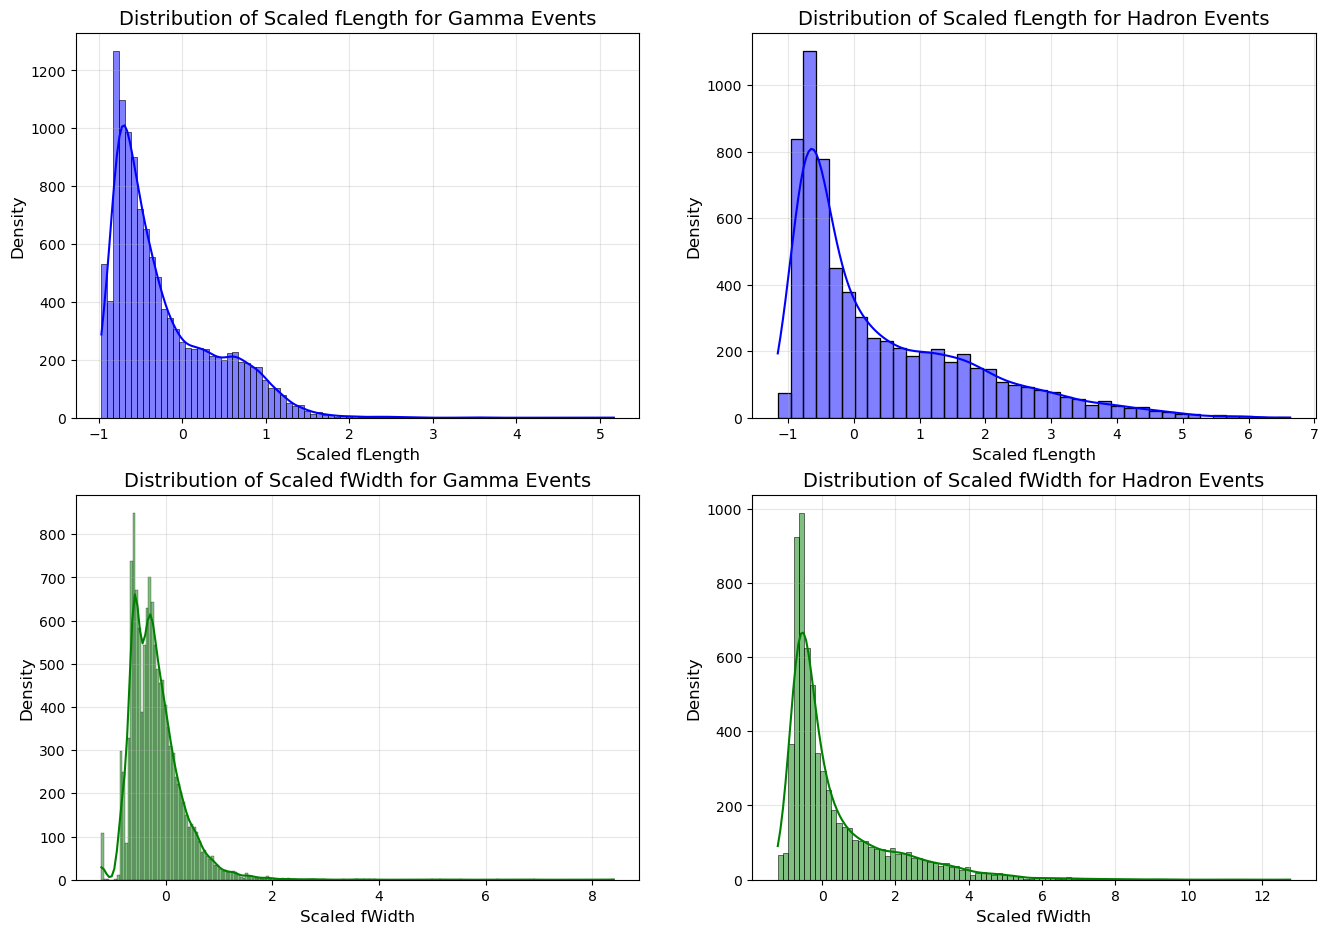

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(16, 11))

# Plot for scaled fLength, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fLength'], kde=True, color='blue', ax=axes[0][0])
axes[0][0].set_title("Distribution of Scaled fLength for Gamma Events", fontsize=14)
axes[0][0].set_xlabel("Scaled fLength", fontsize=12)
axes[0][0].set_ylabel("Density", fontsize=12)
axes[0][0].grid(True, alpha=0.3)

# Plot for scaled fWidth, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'], kde=True, color='green', ax=axes[1][0])
axes[1][0].set_title("Distribution of Scaled fWidth for Gamma Events", fontsize=14)
axes[1][0].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][0].set_ylabel("Density", fontsize=12)
axes[1][0].grid(True, alpha=0.3)

# Plot for scaled fLength, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fLength'], kde=True, color='blue', ax=axes[0][1])
axes[0][1].set_title("Distribution of Scaled fLength for Hadron Events", fontsize=14)
axes[0][1].set_xlabel("Scaled fLength", fontsize=12)
axes[0][1].set_ylabel("Density", fontsize=12)
axes[0][1].grid(True, alpha=0.3)

# Plot for scaled fWidth, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fWidth'], kde=True, color='green', ax=axes[1][1])
axes[1][1].set_title("Distribution of Scaled fWidth for Hadron Events", fontsize=14)
axes[1][1].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][1].set_ylabel("Density", fontsize=12)
axes[1][1].grid(True, alpha=0.3)

In [40]:
#fig, axes = plt.subplots(1, 2, figsize=(15, 6))
#sns.histplot(data['fSize'], kde=True, color='blue', label='Low Light', alpha=0.7, ax=axes[0])
#sns.histplot(10**data['fSize'], kde=True, color='blue', label='Low Light', alpha=0.7,ax=axes[1])
#plt.show()

median_fSize = data['fSize'].median()
min_fSize = data['fSize'].min()
max_fSize = data['fSize'].max()
print("data for fSize: median= ",median_fSize, 'min= ', min_fSize, 'max= ', max_fSize)
#### I don't know if I should differentiate between median of h and g I don't think so because the light quantity 
#### should be independent from the nature of the phenomenon
##as a threshold I don't know if need to use a median or maybe just the half


data for fSize: median=  2.7396 min=  1.9413 max=  5.3233
data for 10^x: median=  549.0349610252033 min=  87.35746039721522 max=  210523.21804752303
0          329.989408
1        11513.304742
2          218.021840
3         1449.105484
4          810.027942
             ...     
19014      413.142621
19015      185.012043
19016     2807.372232
19017     9860.524125
19018     1619.198154
Name: fSize, Length: 19019, dtype: float64


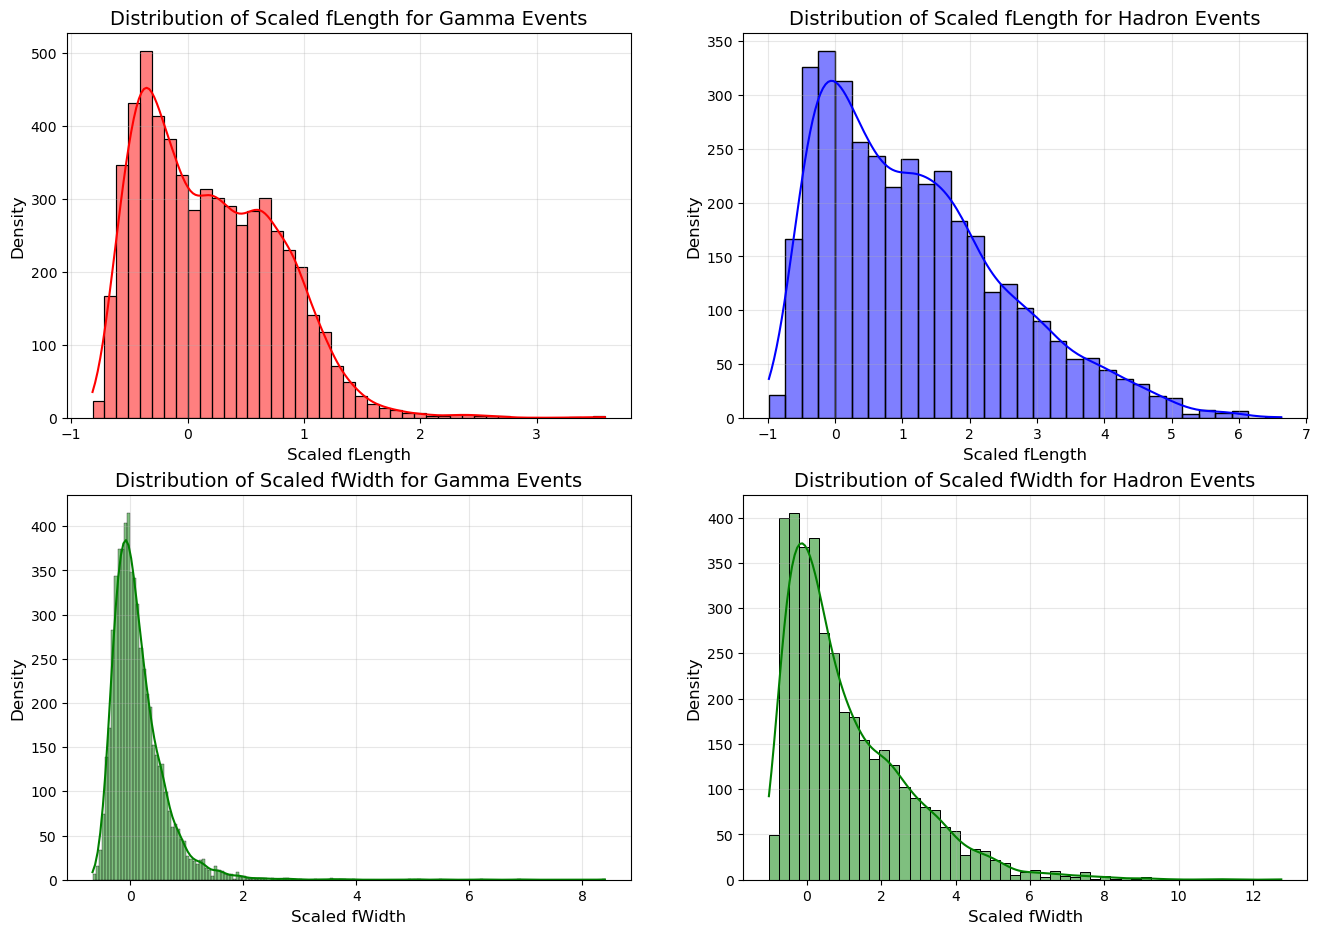

In [49]:
## suppose I use the median

#high_light=data[data['fSize']>median_fSize]
#print(high_light[])

### HIGH LIGHT  ############

fig, axes = plt.subplots(2, 2, figsize=(16, 11))

# Plot for scaled fLength, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fLength'][data['fSize'] >= median_fSize], kde=True, color='red', ax=axes[0][0])
axes[0][0].set_title("Distribution of Scaled fLength for Gamma Events", fontsize=14)
axes[0][0].set_xlabel("Scaled fLength", fontsize=12)
axes[0][0].set_ylabel("Density", fontsize=12)
axes[0][0].grid(True, alpha=0.3)

# Plot for scaled fWidth, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'][data['fSize'] >= median_fSize], kde=True, color='green', ax=axes[1][0])
axes[1][0].set_title("Distribution of Scaled fWidth for Gamma Events", fontsize=14)
axes[1][0].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][0].set_ylabel("Density", fontsize=12)
axes[1][0].grid(True, alpha=0.3)

# Plot for scaled fLength, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fLength'][data['fSize'] >= median_fSize], kde=True, color='blue', ax=axes[0][1])
axes[0][1].set_title("Distribution of Scaled fLength for Hadron Events", fontsize=14)
axes[0][1].set_xlabel("Scaled fLength", fontsize=12)
axes[0][1].set_ylabel("Density", fontsize=12)
axes[0][1].grid(True, alpha=0.3)

# Plot for scaled fWidth, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fWidth'][data['fSize'] >= median_fSize], kde=True, color='green', ax=axes[1][1])
axes[1][1].set_title("Distribution of Scaled fWidth for Hadron Events", fontsize=14)
axes[1][1].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][1].set_ylabel("Density", fontsize=12)
axes[1][1].grid(True, alpha=0.3)

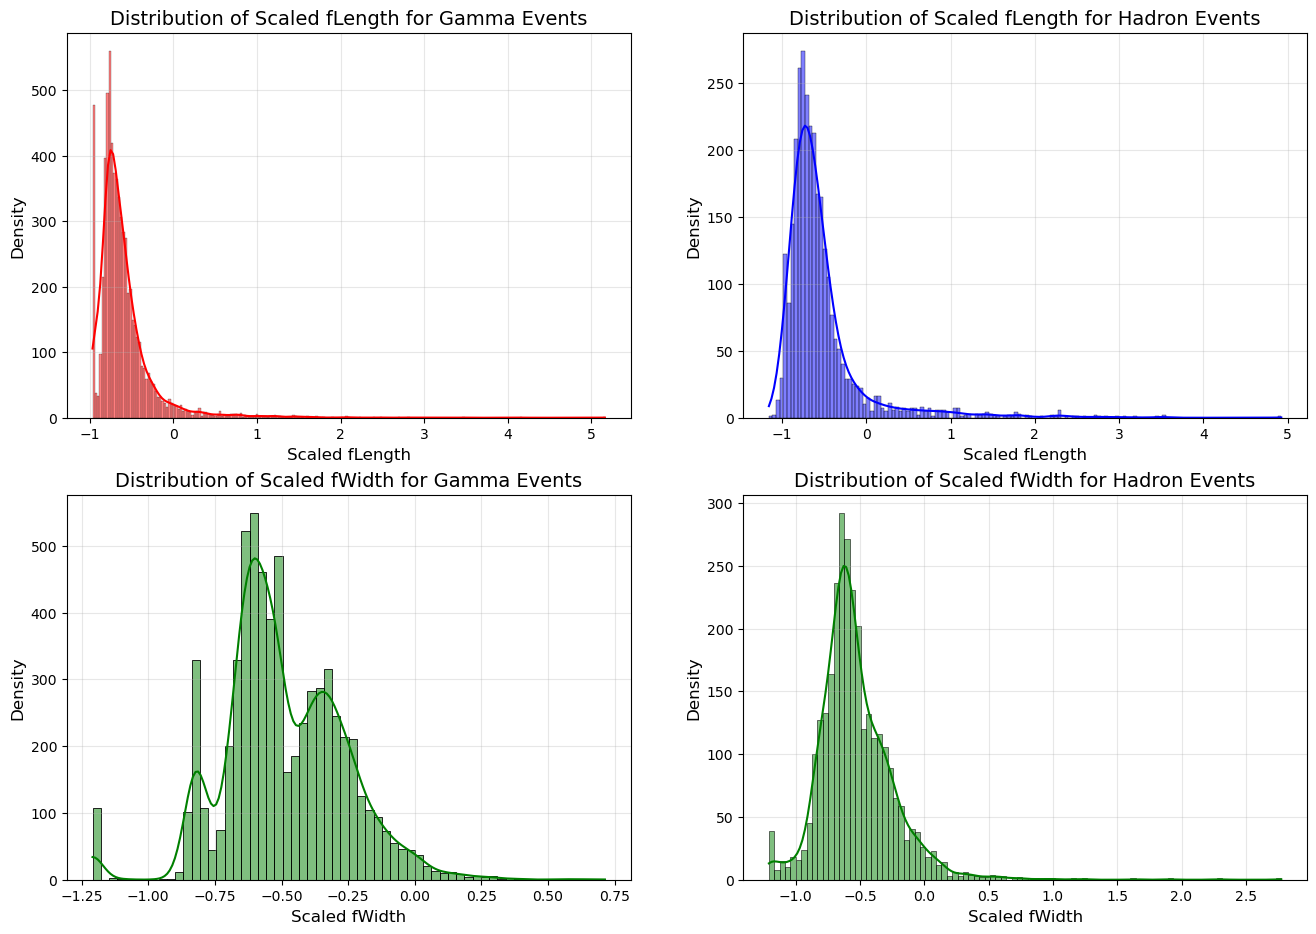

In [50]:
### LOW LIGHT  ############

fig, axes = plt.subplots(2, 2, figsize=(16, 11))

# Plot for scaled fLength, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fLength'][data['fSize'] <= median_fSize], kde=True, color='red', ax=axes[0][0])
axes[0][0].set_title("Distribution of Scaled fLength for Gamma Events", fontsize=14)
axes[0][0].set_xlabel("Scaled fLength", fontsize=12)
axes[0][0].set_ylabel("Density", fontsize=12)
axes[0][0].grid(True, alpha=0.3)

# Plot for scaled fWidth, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'][data['fSize'] <= median_fSize], kde=True, color='green', ax=axes[1][0])
axes[1][0].set_title("Distribution of Scaled fWidth for Gamma Events", fontsize=14)
axes[1][0].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][0].set_ylabel("Density", fontsize=12)
axes[1][0].grid(True, alpha=0.3)

# Plot for scaled fLength, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fLength'][data['fSize'] <= median_fSize], kde=True, color='blue', ax=axes[0][1])
axes[0][1].set_title("Distribution of Scaled fLength for Hadron Events", fontsize=14)
axes[0][1].set_xlabel("Scaled fLength", fontsize=12)
axes[0][1].set_ylabel("Density", fontsize=12)
axes[0][1].grid(True, alpha=0.3)

# Plot for scaled fWidth, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fWidth'][data['fSize'] <= median_fSize], kde=True, color='green', ax=axes[1][1])
axes[1][1].set_title("Distribution of Scaled fWidth for Hadron Events", fontsize=14)
axes[1][1].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][1].set_ylabel("Density", fontsize=12)
axes[1][1].grid(True, alpha=0.3)

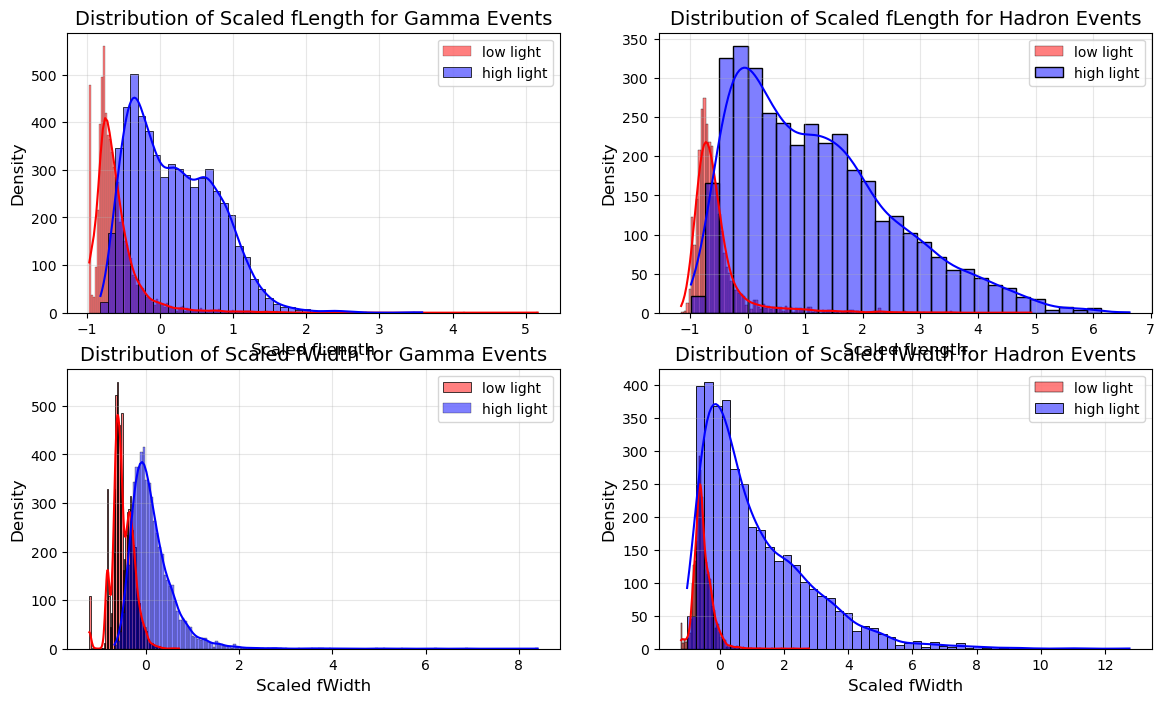

In [63]:
### LOW LIGHT  ############

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Plot for scaled fLength, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fLength'][data['fSize'] <= median_fSize], kde=True, color='red', ax=axes[0][0], label='low light')

# Plot for scaled fWidth, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'][data['fSize'] <= median_fSize], kde=True, color='red', ax=axes[1][0],label='low light')

# Plot for scaled fLength, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fLength'][data['fSize'] <= median_fSize], kde=True, color='red', ax=axes[0][1],label='low light')

# Plot for scaled fWidth, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fWidth'][data['fSize'] <= median_fSize], kde=True, color='red', ax=axes[1][1],label='low light')

### HIGH LIGHT  ############

# Plot for scaled fLength, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fLength'][data['fSize'] >= median_fSize], kde=True, color='blue', ax=axes[0][0],label='high light')
axes[0][0].set_title("Distribution of Scaled fLength for Gamma Events", fontsize=14)
axes[0][0].set_xlabel("Scaled fLength", fontsize=12)
axes[0][0].set_ylabel("Density", fontsize=12)
axes[0][0].grid(True, alpha=0.3)
axes[0][0].legend()

# Plot for scaled fWidth, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'][data['fSize'] >= median_fSize], kde=True, color='blue', ax=axes[1][0],label='high light')
axes[1][0].set_title("Distribution of Scaled fWidth for Gamma Events", fontsize=14)
axes[1][0].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][0].set_ylabel("Density", fontsize=12)
axes[1][0].grid(True, alpha=0.3)
axes[1][0].legend()

# Plot for scaled fLength, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fLength'][data['fSize'] >= median_fSize], kde=True, color='blue', ax=axes[0][1],label='high light')
axes[0][1].set_title("Distribution of Scaled fLength for Hadron Events", fontsize=14)
axes[0][1].set_xlabel("Scaled fLength", fontsize=12)
axes[0][1].set_ylabel("Density", fontsize=12)
axes[0][1].grid(True, alpha=0.3)
axes[0][1].legend()

# Plot for scaled fWidth, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fWidth'][data['fSize'] >= median_fSize], kde=True, color='blue', ax=axes[1][1],label='high light')
axes[1][1].set_title("Distribution of Scaled fWidth for Hadron Events", fontsize=14)
axes[1][1].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][1].set_ylabel("Density", fontsize=12)
axes[1][1].grid(True, alpha=0.3)
axes[1][1].legend()

plt.show()